# Import Necessary Libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
import pandas as pd
import os

# Nessesary Functions

In [22]:
def define_dp(data_location):
    data = pd.read_csv(f'../data/Gold_size/{data_location}')
    # Save readings into a dictionary
    dic = {'Weight': list(data.loc[:, 'Peso']), 
           'Concentraciones': list(data.loc[:, 'Concentration']), 
           'psize': list(data.loc[:, 'Particle size'])}

    # Generate dataframe for data processing
    Data = pd.DataFrame(dic)

    # DATA PROSSESING
    # Contenido de oro en mg/tonelada, para determinar esto se emplea la siguiente relación
    # content = (Atomic Absorption result [mg/L] * 1g / 1000 mg * 1 L/1000 mL * 10mL) / (sample mass g * 1 ton /1e6 g )
    Au_concentration = np.array([i / 3 for i in list(Data['Concentraciones'])])
    Au_content = np.array([i*j/1e6 for i,j in zip(Au_concentration, Data['Weight'])])
    # Porcentaje de recuperación
    Yield_concentration = np.array([(i)/sum(Au_content)*100 for i in Au_content])

    # Save results into a dataframe
    dic_1 = {'Mesh': list(data.loc[:,'Mesh']),
            'Tamaño partícula[um]': list(Data['psize']),
            'Peso[g]': Data['Weight'],
            'Recuperación[%]': Yield_concentration,
            'Ley [g/ton]': Au_concentration,
            'Contenido [g]': Au_content}
    Results = pd.DataFrame(dic_1)
    # Recuperación acumulada
    Recuperacion_acumulada = [Results['Recuperación[%]'][0]]
    for i in range(len(Results['Recuperación[%]'])-1):
        Recuperacion_acumulada.append(Recuperacion_acumulada[i] + dic_1['Recuperación[%]'][i+1])
    Results['Recuperacion_acumulada'] = Recuperacion_acumulada
    os.makedirs('../data/Resultados', exist_ok=True)
    # Generar archivo de resultados
    Results.to_csv(f'../data/Resultados/Results_{data_location}.csv')
    return Results


In [29]:
def plot_results(
                Data: pd.DataFrame,
                sample: str
):
        plt.figure(1)
        fig = plt.figure()
        ax = plt.axes()
        ax.plot(list(Data['Tamaño partícula[um]']), Data['Recuperación[%]'])
        ax.set_xlabel('Tamaño de partícula [um]')
        ax.set_ylabel('Recuperación [%]')
        ax.set_title(f'Malla Valorada {sample}')
        plt.grid()
        plt.show()
        

        plt.figure(2)
        fig2 = plt.figure()
        ax = plt.axes()
        ax.plot(Data['Tamaño partícula[um]'], Data['Recuperacion_acumulada'])
        ax.set_xlabel('Tamaño de partícula [um]')
        ax.set_ylabel(f'Recuperación Acumulada {sample} [%]')
        plt.grid()
        plt.show()
        
        # Export graphs
        '''
        fig.savefig('../Figuras/Malla_valorada_BP.jpg', dpi=1000)
        plt.close(fig)
        fig2.savefig('../Figuras/Recuperacion_acumulada_p6.jpg', dpi=1000)
        plt.close(fig2)
        '''



In [23]:
Results_BP = define_dp('Datos_dp_BP.csv')
Results_p4 = define_dp('Datos_dp_P4.csv')
Results_p6 = define_dp('Datos_dp_P6.csv')

# Graficar resultados

<Figure size 640x480 with 0 Axes>

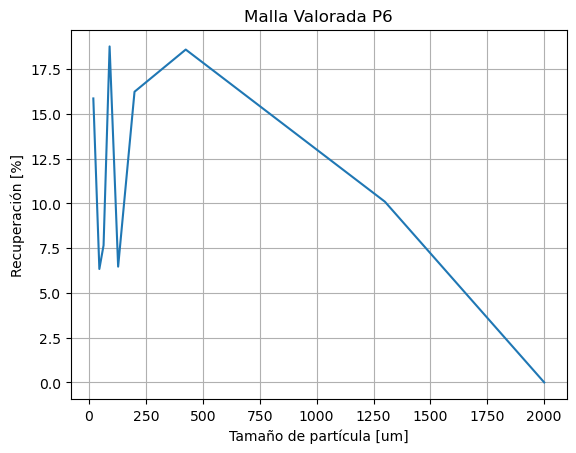

<Figure size 640x480 with 0 Axes>

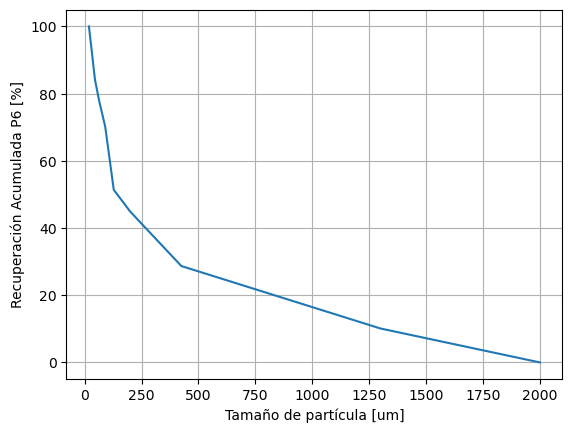

In [31]:
plot_results(Results_p6, 'P6')

De acuerdo con las figuras obtenidas en el caso de la muestra P6 se concluye que el oro se encuentra principalmente distribuido en un tamaño de partícula infeiror a 500 um. Por lo cual se decidió reducir el tamaño de la partícula de la muestra hasta un tamaño cecano a 100 um para alcanzar una recuperación cercana al 50%.

<Figure size 640x480 with 0 Axes>

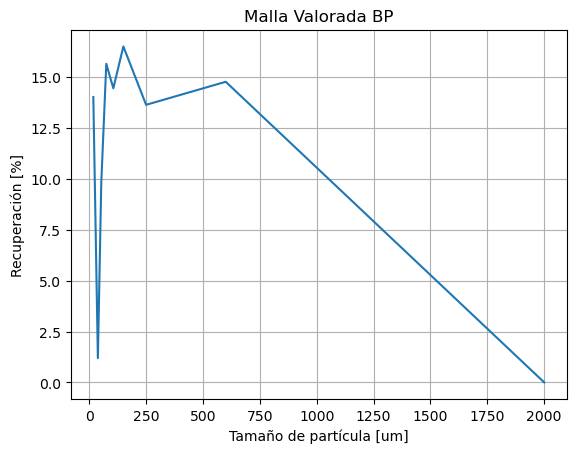

<Figure size 640x480 with 0 Axes>

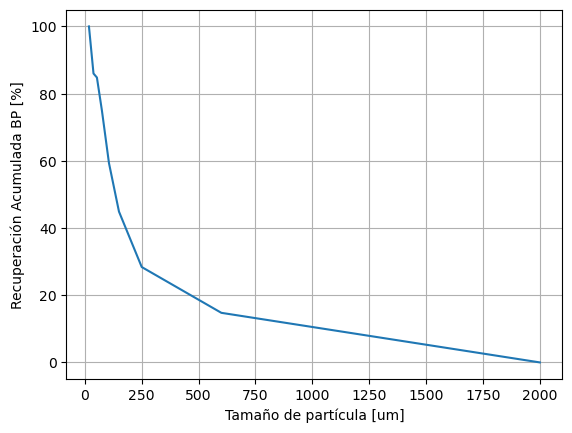

In [33]:
plot_results(Results_BP, 'BP')